C&S10.3 Sublimation of a Sphere

Shooting Method for Diffusion Over a Varying Area

##### C&S10.3
A sphere of dichlorobenzene suspended in still air slowly sublimates and diffuses into the air around it.  What is the rate of diffusion given a specified surface vapor pressure?
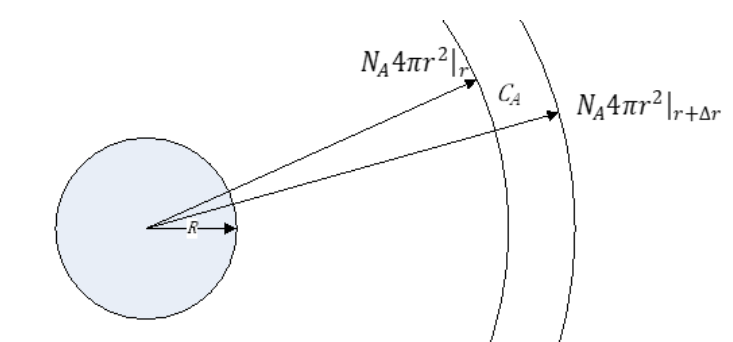
Using a control volume within the gas sorrounding the sublimating sphere  of $\Delta V=A\Delta r$ gives a differential mole balance, where A is the surface area of a hollow sphere, or 4$\pi r^2$

Differential mole Balance in r direction
	$$\Delta V \frac{\partial C_A}{\partial t}=N_AA|_r-N_AA|_{r+∆r}  	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(1)$$	 	
Dividing by the control volume and taking the limit
	$$\lim_{\Delta r \to 0} \frac{\partial C_A}{\partial t}=\frac{N_AA|_r-N_AA|_{r+\Delta r}}{4\pi r^2\Delta r }	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(2)$$

Changing the numerator to always have the $\Delta r$ term first and then taking the limit to remove the $\Delta 's$ and obtain a partial derivative:
	$$\frac{\partial C_A}{\partial t}=-\frac{\partial N_A A}{ 4\pi r^2 \partial r}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(3)$$

Assume a pseudo steady-state based on the small rate of evaporation and the subsequent small changes in solid sphere diameter and concentration in the control volume.  
	$$\frac{\partial\left(N_AA\right)}{\partial r}=0	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(4)$$
Integrating this equation gives
	$$N_AA=N_A4\pi r^2=constant	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(5)$$
The constitutive equation for mass transfer is that the flux of moles is equal to a diffusive flux and a convective flux.  For a binary system of only 2 components A and B we get:  
	$$N_A=J_A+y_A\left(N_A+N_B\right)	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(6)$$
In this case, B (the air) is stagnant, so we can simplify:
	$$N_A=J_A+y_A\left(N_A\right)	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(7)$$

And solving for the flux of A
	$$N_A=\frac{J_A}{1-y_A}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(8)$$
The diffusive flux of A has been found to be from experiments
	$$J_A=-C_T\mathcal{D}\frac{dy_A}{dr}=-\frac{P\mathcal{D}}{RT}\frac{dy_A}{dr}	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(9)$$
The two ODE's that we will solve are 
	$$\frac{\partial\left(N_AA\right)}{\left(\partial r\right)}=0	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(10)$$
	$$\frac{dy_A}{dr}=-\frac{N_ART}{P\mathcal{D}}\left(1-y_A\right)	\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(11)$$

From the problem statement we know the boundary conditions.  We are given the vapor pressure, and by calculation $y_A$ at the surface of the sphere, which has a radius of 3mm.  At a large value of r (an arbitrary choice, but any value much larger than 3mm) $y_A$ will be 0.  For the given diffusivity, we can calculate the profile of $y_A$ given an initial value for $\left(N_AA\right)$. We will use the same shooting method used in C&S10.1 to find the correct value for $\left(N_AA\right)$.  The key difference with this problem is that $N_A$ in equation 11, the molar flux of A ($kmol/m^2s$) is not constant for a problem.  Because the area that A is diffusing through is changing, only the molar diffusion rate $\left(N_AA\right)$ (kmol/s) is constant.  $N_A$ must be calculated from $\left(N_AA\right)$ using equation 5.


The values of the constants are:  $\mathcal{D}=7.39\times{10}^{-6}\, $ $\frac{m^2}{s}\,$ $T = 25^{\circ} C$, $P=101.325\ kPa\,$ and $p_A^{vap}=1.0 mmHg *\frac{101325 Pa}{760 mmHg}=133\ Pa$

$y_A$=$\frac{p_A}{P}= \frac{1 mmHg}{760 mmHg}= 0.00132 @ r = 0.003 m$

We need a guess for $N_AA=N_A4\pi r^2$.  We know $y_A$ is small, so $N_A$ ~ $J_A$. 

Use (9) to estimate $J_A$, using $y_A$ at the surface divided by a distance (1 cm?) to estimate $\frac{dy_A}{dr}$. Multiply by A at the surface to estimate $N_AA$


In [13]:
#estimating a starting value of NA
DAB = 7.39e-6 #m^2/s
R = 8314    #Pa m^3 / kmol K
T = 298.15  #K
P = 101325
yAsurf= 1/760
NAAest= -P*DAB/(R*T)*yAsurf/(0.003-0.01)*(0.003**2)
print(NAAest)
print(yAsurf)

5.110308212996729e-13
0.0013157894736842105


In [10]:
#  These are imports that we need to be able to run the ODE solver and plot the results. ivp stands for initial value problem.
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

The function ODEfun defines the 2 derivatives that we are solving:

dyAdr$=\frac{dy_A}{dr}=-\frac{N_ART}{P\mathcal{D}}\left(1-y_A\right)\;\;(11)$
 
dNAAdr$=\frac{\partial\left(N_AA\right)}{\left(\partial r\right)}=0\;\;(10)$

The numerical values of these derivatives are calculated using the values of r and the values of yA NAA passed in line 2 
of the code below.  Lines 3 and 4 unpack the vector that was sent through Yfuncvec to give yA and NAA ($N_AA$).  
After the derivatives are calculated they are sent out of the subroutine through the vector dYfuncvecdr.  
The first element (dYfuncvecdr[0]) contains dyAdr and the second element (dyfuncvecdr[1]) contains dNAAdr.


In [11]:
# This code defines the functions to calculate the differential equations described above in (10) and (11)
def  ODEfun(r,Yfuncvec):
    yA = Yfuncvec[0] 
    NAA = Yfuncvec[1] #Remember that NAA is NA*particle surface area

    NA = NAA/(4*np.pi*r**2)    
    dyAdr = 0 - NA*R*T/(DAB*P)*(1 - yA) #Eq'n (11) above
    dNAAdr = 0 #Eq'n (10)
    dYfuncvecdr = [dyAdr, dNAAdr] 
    return dYfuncvecdr

In [12]:
#test of function ODEfun with the equilibrium vapor pressure yAeq and the initial flux guess NAAest calculated above.  
rspan = [0.003, 16] # Range for the independent variable. We are assuming that far from the sphere is 10m. 
y0 = [yAsurf, NAAest] # Initial values for the dependent variables 

sol=ODEfun(0.003,y0)
print (sol)
print(y0)

[-0.01493848953882427, 0]
[0.0013157894736842105, 5.110308212996729e-13]


In [15]:
# Here we're going to use the function solve_ivp to integrate the differential equations in ODEfun for z from 0.003m to 16m 16] # Range for the independent variable 
y0 = [yAsurf, NAAest] # Initial values for the dependent variables 
print('           y     dy/dz  d(Na*A)/dz      ')
sol=ODEfun(rspan[0],y0) 
print('    {:7.5f}    {:7.5f} {:7.2e} \n'.format(y0[0],sol[0],sol[1]))
sol=solve_ivp(ODEfun,rspan,y0)#solve the ODE 
print(sol)

           y     dy/dz  d(Na*A)/dz      
    0.00132    -0.01494 0.00e+00 

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([3.00000000e-03, 2.46882271e-02, 5.60774536e-02, 1.95281268e-01,
       7.16876456e-01, 3.14817458e+00, 1.60000000e+01])
 t_events: None
        y: array([[1.31578947e-03, 1.26844736e-03, 1.26539451e-03, 1.26366138e-03,
        1.26315167e-03, 1.26300185e-03, 1.26296564e-03],
       [5.11030821e-13, 5.11030821e-13, 5.11030821e-13, 5.11030821e-13,
        5.11030821e-13, 5.11030821e-13, 5.11030821e-13]])
 y_events: None


The sol results above show two arrays, t and y.  The t array is our r, because this solver assumes time is the independent
variable.  We're using r.  You can see that t (r for us) goes from 0 to 16 m.
The y array gives the results for $y_A$ (first row) and $N_AA$ (second row).  $N_AA$ doesn't change, because we 
made it's derivative 0.  $y_A$ decreases from its initial value of 1.316e-3 down to 1.26e-3.  That's not far enough, 
as we need it to be 0 at 16m (far from the sphere), but that's OK.  We're close.  

In [16]:
#Try to guess NA, starting at our first estimate (5.11e-13), to try to get the final $y_A$ equal to 0
NAAest=5.110308212996729e-13# Replace this value for your guesses

rspan = [0.003, 16] # Range for the independent variable 
y0 = [yAsurf, NAAest] # Initial values for the dependent variables 

print('           Final y value           ')
sol=solve_ivp(ODEfun,rspan,y0)#solve the ODE 
print(sol.y[0,-1])


           Final y value           
0.0012629656351492572


Tired of guessing?  Did you try interpolating by hand (using your interpolation spreadsheet?  But there is no need for doing this manually.  In C&S10.1 we used python to iterate using the secant (interpolations) method.

In [17]:
#Test Cell
rspan = [0.003, 16] # Range for the independent variable 

#initialize arrays
yini=np.zeros(21)
f=np.zeros(21)
#input the first 2 guesses for the secant method

yini[0]=NAAest
yini[1]=NAAest*0.5 # Test solution showed that the flux was too high (y didn't reach 0).  Use 1/2 as a second guess.

k=0 #python starts arrays at 0
y0 = [yAsurf,yini[k]]# Initial values for the dependent variables
sol=solve_ivp(ODEfun,rspan,y0)#solve the ODE with first guess
f[k] = sol.y[0,-1] 
print('   Trial    y0       f(0)        yAfinal')
print('   {:d}  {:6.4e}   {:8.4f}       {:6.4f}'.format(k+1, yini[k], f[k], sol.y[0,-1]))

k=1 #python starts arrays at 0
y0 = [yAsurf,yini[k]]
sol=solve_ivp(ODEfun,rspan,y0)#solve the ODE with second guess
f[k] = sol.y[1,-1] 
print('   {:d}  {:6.4e}   {:8.4f}       {:6.4f}'.format(k+1, yini[k], f[k], sol.y[0,-1]))
err=np.abs(f[k])

while (err>1e-17 and k<20): #multiple iterations (up to 20) to get err<1e-6
    yini[k+1]= yini[k]-f[k]*(yini[k]-yini[k-1])/(f[k]-f[k-1])  # Secant method formula from above
    y0 = [yAsurf,yini[k+1]] #New guess for NA at z = 0
    sol=solve_ivp(ODEfun,rspan,y0,rtol=1e-6)  #Integrate with the new guess
    f[k+1] = sol.y[0,-1] #Result we're after is the yA value at r=10, which is the last column of the first row of sol
    print('   {:d}  {:6.4e}    {:8.4e}   {:6.4e}'.format(k+2, yini[k+1], f[k+1], sol.y[0,-1]))
    err=np.abs(f[k+1])  #Our target is for yA to be 0 at the top of the tube.  The error is how far from 0 we are
    k=k+1  # We keep going until yAfinal is within 10^-6 of 0

   Trial    y0       f(0)        yAfinal
   1  5.1103e-13     0.0013       0.0013
   2  2.5552e-13     0.0000       0.0013
   3  2.5552e-13    1.2891e-03   1.2891e-03
   4  2.5552e-13    1.2891e-03   1.2891e-03
   5  1.4015e-11    8.5479e-05   8.5479e-05
   6  1.4992e-11    -2.1680e-07   -2.1680e-07
   7  1.4989e-11    4.1379e-11   4.1379e-11
   8  1.4989e-11    1.8528e-17   1.8528e-17
   9  1.4989e-11    -8.7324e-20   -8.7324e-20


In [19]:
#printing of the results
# Here we're going to re-run with 100 points to make a nice, smooth graph.  teval is 100 points from z = 0 to z = 0.238 m
# We're using the initial conditions (y0 @ z=0) that we found above that solved the problem correctly

teval=np.linspace(rspan[0],rspan[1],100)
sol=solve_ivp(ODEfun,rspan,y0,t_eval=teval) # Same as before, just more z points for graphing


#loading the constants 
DAB = 7.39e-6 #m^2/s
R = 8314    #Pa m^3 / kmol K
T = 298.15  #K
P = 101325
yAsurf= 133.32/101325

NACALC = DAB * P /(R*T*0.003)* np.log(1/(1-yAsurf)) #This is the theoretical result from the text
NAACALC = 4*np.pi*0.003**2*NACALC 


print('                     Summary of Results\n')
print('numerical NA*A = {:6.4e} mol/s    Analytical NA*A =  {:6.4e} mol/s'.format(
                    sol.y[1][-1], NAACALC))
print('numerical NA = {:6.4e} mol/m^2/s    Analytical NA =  {:6.4e} mol/m^2/s'
                                     .format(sol.y[1][-1]/(4*np.pi*0.003**2), NAACALC/(4*np.pi*0.003**2)))
print('\nSolution ')
print('   r         yA        yA_ANAL      ')
print('  (m)    (mol frac)  (mol frac)  ')

y_anal=np.zeros(100)
row=0
for row in range(100):
    y_anal[row] = 1 - (1 - yAsurf)**(0.003/sol.t[row]) #Theoretical value for y to compare
   
    print('{:4.4f} {:6.4e} {:6.4e} '.format(sol.t[row],sol.y[0][row],y_anal[row] ))

                     Summary of Results

numerical NA*A = 1.4989e-11 mol/s    Analytical NA*A =  1.4994e-11 mol/s
numerical NA = 1.3254e-07 mol/m^2/s    Analytical NA =  1.3257e-07 mol/m^2/s

Solution 
   r         yA        yA_ANAL      
  (m)    (mol frac)  (mol frac)  
0.0030 1.3158e-03 1.3158e-03 
0.1646 2.3758e-05 2.3999e-05 
0.3262 1.1765e-05 1.2110e-05 
0.4878 7.8071e-06 8.0980e-06 
0.6493 5.7396e-06 6.0829e-06 
0.8109 4.5263e-06 4.8708e-06 
0.9725 3.7586e-06 4.0615e-06 
1.1341 3.1913e-06 3.4828e-06 
1.2957 2.7410e-06 3.0485e-06 
1.4573 2.3952e-06 2.7105e-06 
1.6189 2.1112e-06 2.4399e-06 
1.7804 1.8787e-06 2.2185e-06 
1.9420 1.6885e-06 2.0339e-06 
2.1036 1.5325e-06 1.8777e-06 
2.2652 1.4034e-06 1.7437e-06 
2.4268 1.2949e-06 1.6276e-06 
2.5884 1.2017e-06 1.5260e-06 
2.7500 1.1196e-06 1.4363e-06 
2.9115 1.0453e-06 1.3566e-06 
3.0731 9.7636e-07 1.2853e-06 
3.2347 9.1155e-07 1.2211e-06 
3.3963 8.5051e-07 1.1630e-06 
3.5579 7.9385e-07 1.1102e-06 
3.7195 7.4322e-07 1.0619e-06 
3.8811 

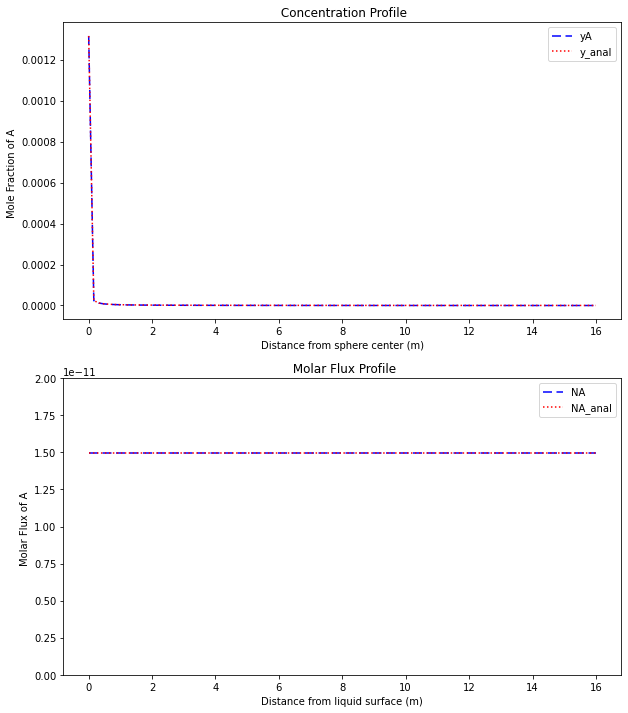

In [20]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='yA',dashes=[6, 3])
plt.plot(sol.t,y_anal,':r', label='y_anal')
plt.title(' Concentration Profile')
plt.xlabel('Distance from sphere center (m)')
plt.ylabel('Mole Fraction of A ')
plt.legend()

plt.subplot (2,1,2)
plt.ylim(0, 0.01)
plt.plot(sol.t,sol.y[1],'b',label='NA',dashes=[6, 3])

plt.plot((sol.t[0],sol.t[-1]),(NAACALC,NAACALC),':r', label='NA_anal')
plt.ylim(0, 2e-11)
plt.title(' Molar Flux Profile')
plt.xlabel('Distance from liquid surface (m)')
plt.ylabel('Molar Flux of A ')
plt.legend()


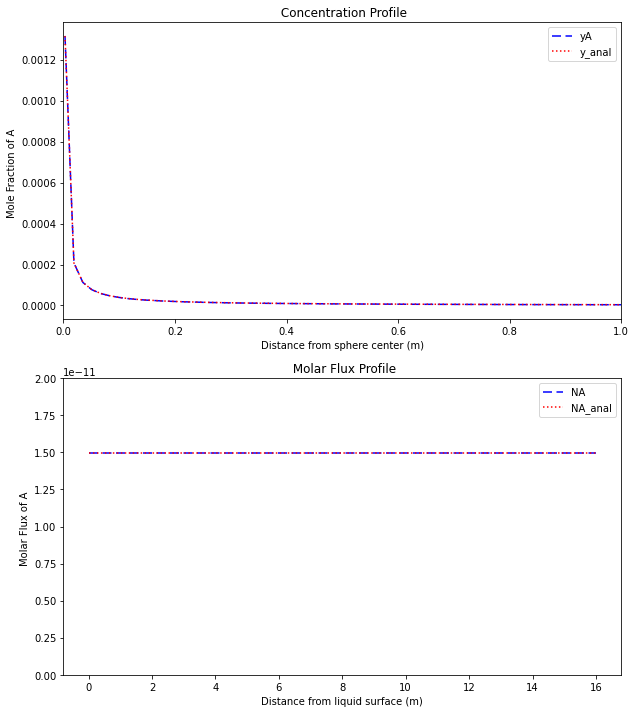

In [24]:
# if you want to examine the first plot in more detail increase the number of points to evaluate the solution
# and reduce the size of the x axis
teval=np.linspace(rspan[0],rspan[1],1000)
sol=solve_ivp(ODEfun,rspan,y0,t_eval=teval) # Same as before, just more z points for graphing
y_anal=np.zeros(1000)
row=0
for row in range(1000):
    y_anal[row] = 1 - (1 - yAsurf)**(0.003/sol.t[row]) #Theoretical value for y to compare

plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='yA',dashes=[6, 3])
plt.plot(sol.t,y_anal,':r', label='y_anal')
plt.xlim(0,1)
plt.title(' Concentration Profile')
plt.xlabel('Distance from sphere center (m)')
plt.ylabel('Mole Fraction of A ')
plt.legend()

plt.subplot (2,1,2)
plt.ylim(0, 0.01)
plt.plot(sol.t,sol.y[1],'b',label='NA',dashes=[6, 3])

plt.plot((sol.t[0],sol.t[-1]),(NAACALC,NAACALC),':r', label='NA_anal')
plt.ylim(0, 2e-11)
plt.title(' Molar Flux Profile')
plt.xlabel('Distance from liquid surface (m)')
plt.ylabel('Molar Flux of A ')
plt.legend()
